In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from scipy.special import expit
import pandas as pd
from sklearn.impute import SimpleImputer
from scipy.stats import skew, norm
import seaborn as sns

In [31]:
train_data = pd.read_csv('/content/train_model_data.csv')
test_data = pd.read_csv('/content/test_model_data.csv')

In [32]:
train_data.head()


,Id,SalePrice,Neighborhood,Condition1,Utilities,LandContour,OverallQual,GarageQual,PoolQC,ProximityToITHub,...,BldgType,HouseStyle,OverallCond,SwimmingPool,CinemaHallProximity,PubProximity,HighSchoolProximity,IntermediateSchoolProximity,UGCollegeProximity,PGCollegeProximity
0,1,8206682,Gurgaon,Adjacent to Metro,24/7,Flood-prone,Tata,Low,Good,Yes,...,Single-family,Two-story,8,No,1,2,3,1,4,3
1,2,9261038,Bandra,Adjacent to Metro,24/7,Flood-prone,Sobha,Low,Good,Yes,...,Single-family,Ranch,8,No,2,1,3,3,1,2
2,3,9345573,Koramangala,2 km from Metro,24/7,Not Flood-prone,Tata,Low,Excellent,Yes,...,Single-family,Ranch,7,No,1,3,3,3,4,3
3,4,9657656,Anna Nagar,1 km from Metro,Tanker-dependent,Flood-prone,DLF,Medium,Excellent,Yes,...,Townhouse,Ranch,7,No,3,2,4,2,1,1
4,5,6099072,Koramangala,1 km from Metro,24/7,Not Flood-prone,Tata,Medium,Excellent,Yes,...,Townhouse,Two-story,5,No,2,3,2,1,2,3


In [33]:
train_data = train_data.drop('Id', axis=1)
test_data=test_data.drop('Id', axis=1)
train_data.head()


,SalePrice,Neighborhood,Condition1,Utilities,LandContour,OverallQual,GarageQual,PoolQC,ProximityToITHub,PublicTransportAccessibility,...,BldgType,HouseStyle,OverallCond,SwimmingPool,CinemaHallProximity,PubProximity,HighSchoolProximity,IntermediateSchoolProximity,UGCollegeProximity,PGCollegeProximity
0,8206682,Gurgaon,Adjacent to Metro,24/7,Flood-prone,Tata,Low,Good,Yes,High,...,Single-family,Two-story,8,No,1,2,3,1,4,3
1,9261038,Bandra,Adjacent to Metro,24/7,Flood-prone,Sobha,Low,Good,Yes,Medium,...,Single-family,Ranch,8,No,2,1,3,3,1,2
2,9345573,Koramangala,2 km from Metro,24/7,Not Flood-prone,Tata,Low,Excellent,Yes,High,...,Single-family,Ranch,7,No,1,3,3,3,4,3
3,9657656,Anna Nagar,1 km from Metro,Tanker-dependent,Flood-prone,DLF,Medium,Excellent,Yes,High,...,Townhouse,Ranch,7,No,3,2,4,2,1,1
4,6099072,Koramangala,1 km from Metro,24/7,Not Flood-prone,Tata,Medium,Excellent,Yes,High,...,Townhouse,Two-story,5,No,2,3,2,1,2,3


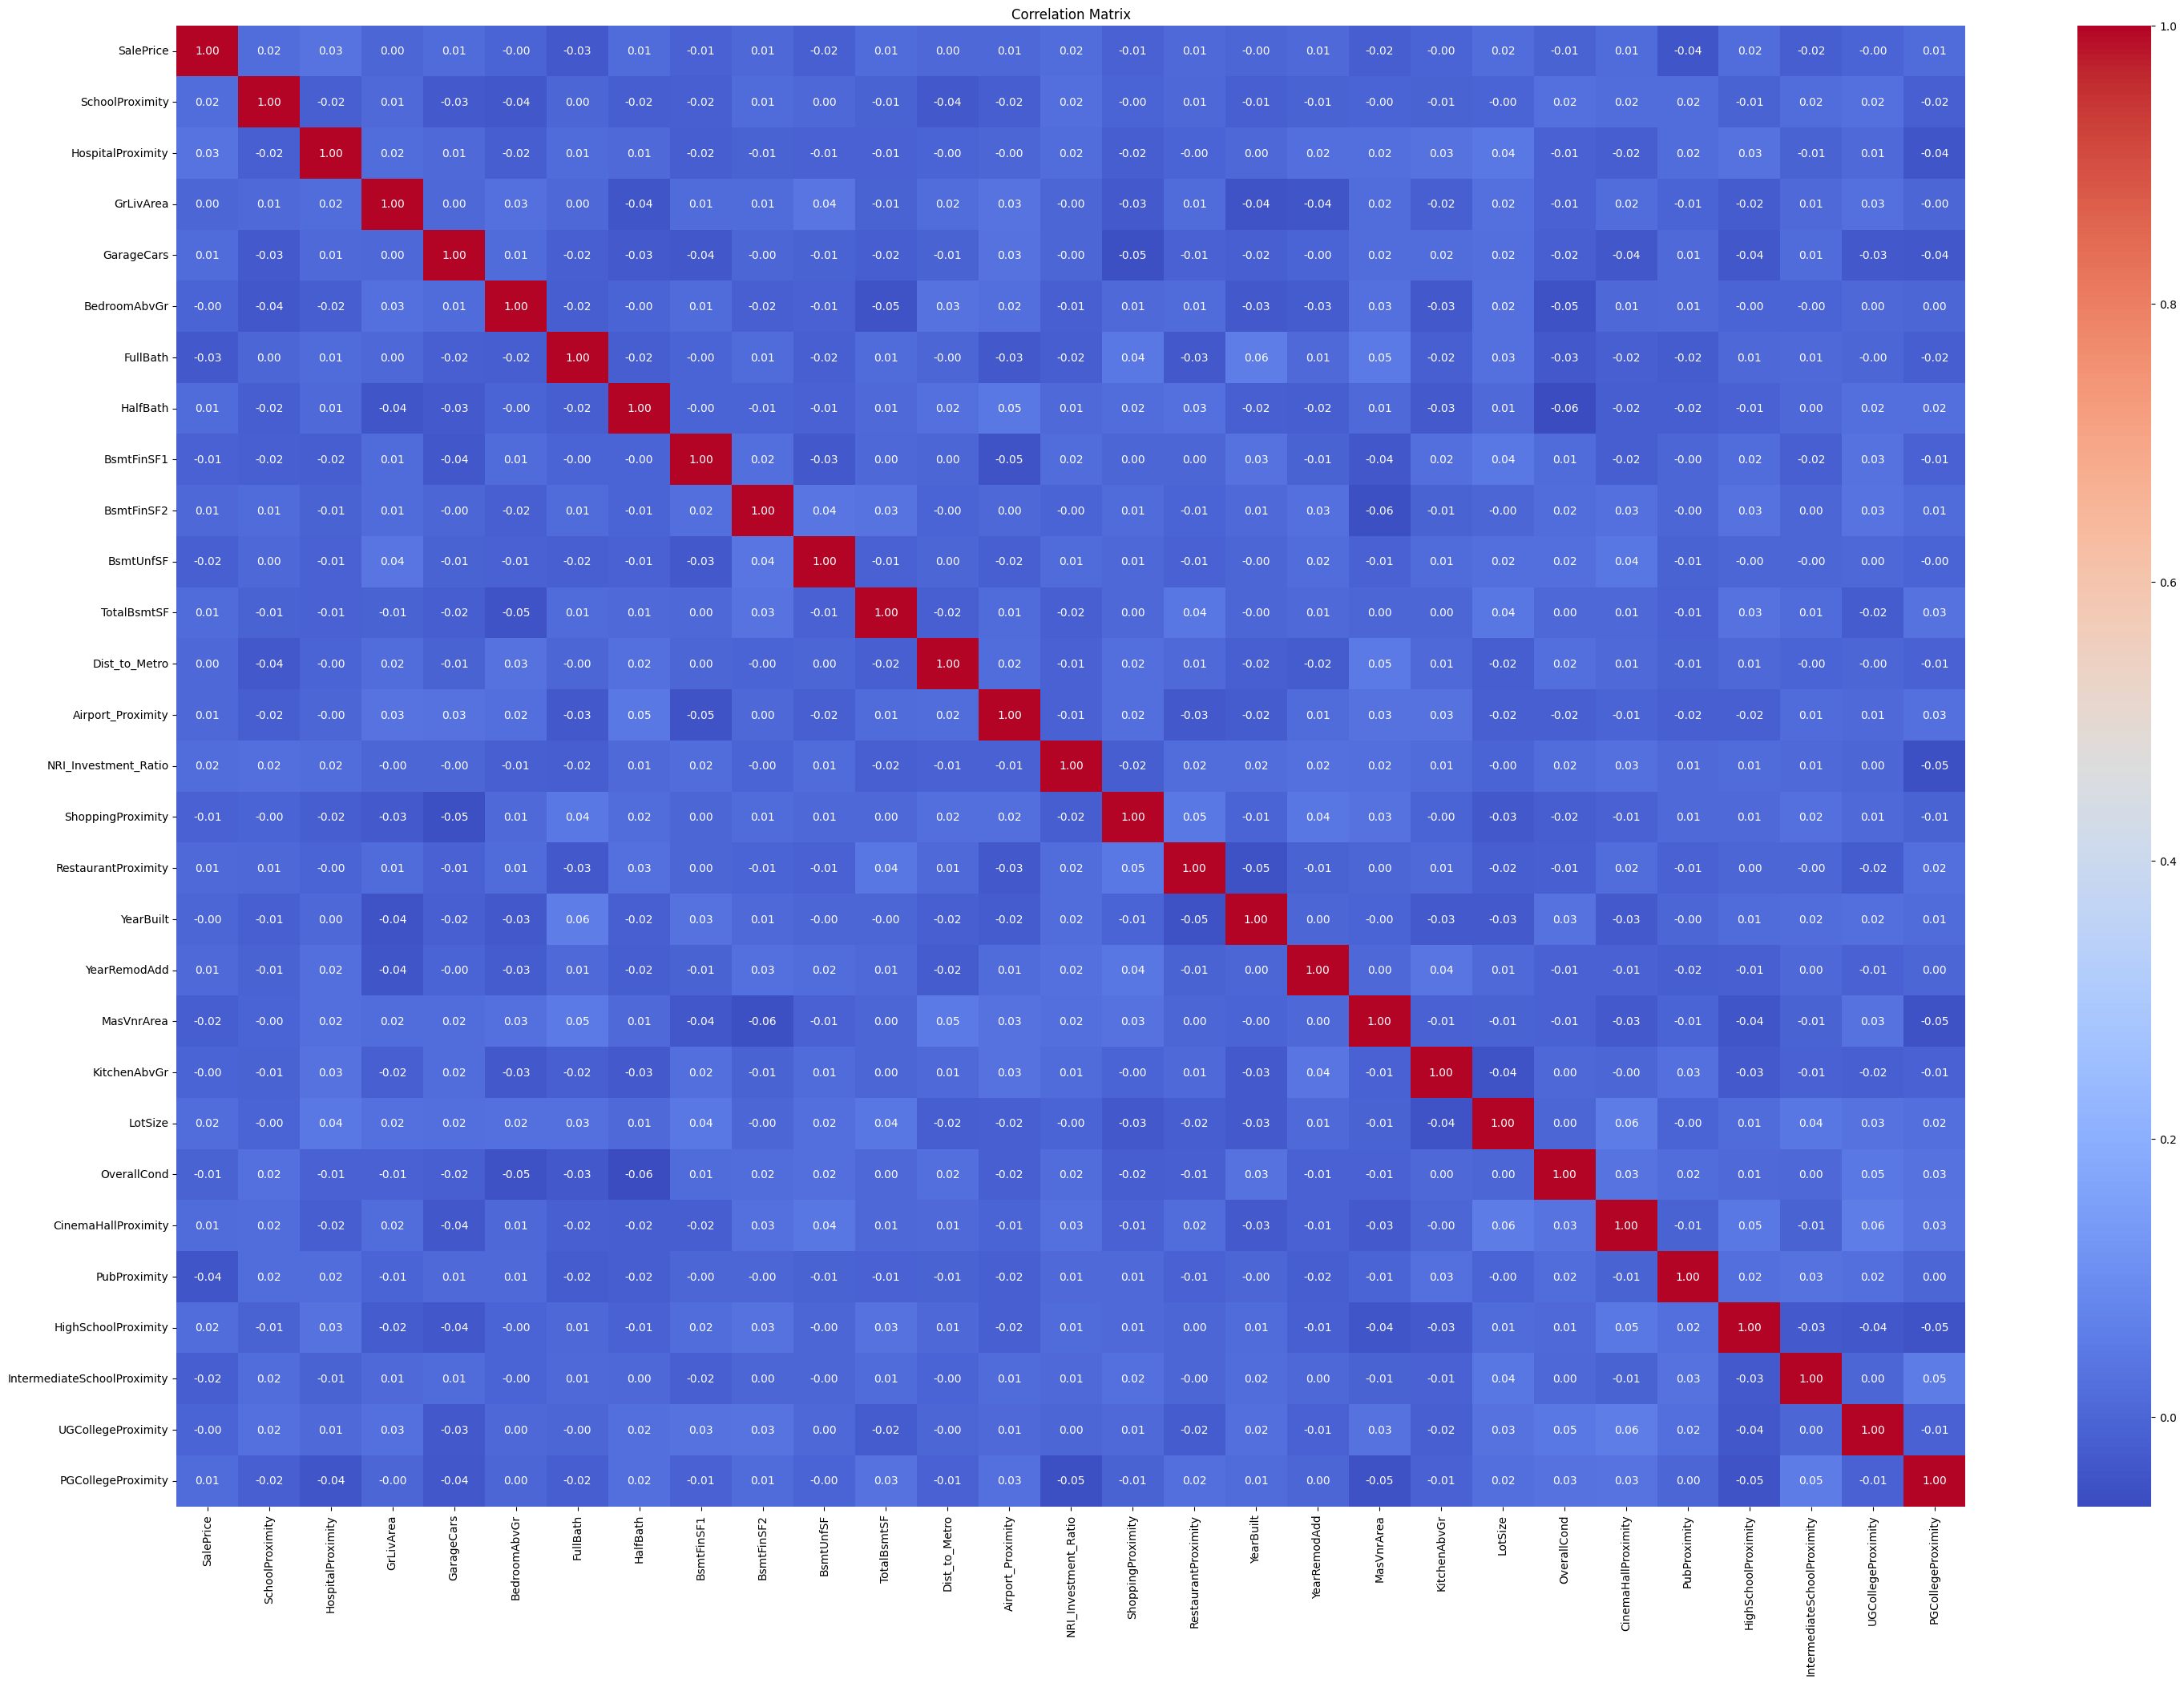

In [34]:
correlation_matrix = train_data.select_dtypes(include=np.number).corr()

plt.figure(figsize=(36,24 ))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [35]:

train_X = train_data.drop('SalePrice', axis=1)
test_X=test_data.drop('SalePrice', axis=1)

train_y_reg = train_data['SalePrice']
test_y_reg=test_data['SalePrice']

train_y_cls = (train_data['SalePrice'] > train_data['SalePrice'].median()).astype(int)
test_y_cls=(test_data['SalePrice'] > train_data['SalePrice'].median()).astype(int)

In [36]:
train_X.head()

,Neighborhood,Condition1,Utilities,LandContour,OverallQual,GarageQual,PoolQC,ProximityToITHub,PublicTransportAccessibility,SchoolProximity,...,BldgType,HouseStyle,OverallCond,SwimmingPool,CinemaHallProximity,PubProximity,HighSchoolProximity,IntermediateSchoolProximity,UGCollegeProximity,PGCollegeProximity
0,Gurgaon,Adjacent to Metro,24/7,Flood-prone,Tata,Low,Good,Yes,High,3,...,Single-family,Two-story,8,No,1,2,3,1,4,3
1,Bandra,Adjacent to Metro,24/7,Flood-prone,Sobha,Low,Good,Yes,Medium,1,...,Single-family,Ranch,8,No,2,1,3,3,1,2
2,Koramangala,2 km from Metro,24/7,Not Flood-prone,Tata,Low,Excellent,Yes,High,1,...,Single-family,Ranch,7,No,1,3,3,3,4,3
3,Anna Nagar,1 km from Metro,Tanker-dependent,Flood-prone,DLF,Medium,Excellent,Yes,High,4,...,Townhouse,Ranch,7,No,3,2,4,2,1,1
4,Koramangala,1 km from Metro,24/7,Not Flood-prone,Tata,Medium,Excellent,Yes,High,2,...,Townhouse,Two-story,5,No,2,3,2,1,2,3


In [37]:
train_y_reg.head()

,SalePrice
0,8206682
1,9261038
2,9345573
3,9657656
4,6099072


In [38]:
train_y_cls.head()

,SalePrice
0,0
1,0
2,0
3,0
4,0


In [39]:
categorical_cols = train_X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_cols)

Categorical columns: ['Neighborhood', 'Condition1', 'Utilities', 'LandContour', 'OverallQual', 'GarageQual', 'PoolQC', 'ProximityToITHub', 'PublicTransportAccessibility', 'AirQuality', 'NoisePollution', 'RegulatoryCompliance', 'LandAcquisitionComplexity', 'RERA_Status', 'City', 'State', 'Local_Economy', 'JobMarket', 'GreenSpaces', 'Fence', 'FireplaceQu', 'Zoning', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'Functional', 'KitchenQual', 'PavedDrive', 'Street', 'Alley', 'LotShape', 'LotConfig', 'LandSlope', 'BldgType', 'HouseStyle', 'SwimmingPool']


In [40]:
numeric_cols = train_X.select_dtypes(include=np.number).columns.tolist()

print("Numerical columns:", numeric_cols)

Numerical columns: ['SchoolProximity', 'HospitalProximity', 'GrLivArea', 'GarageCars', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Dist_to_Metro', 'Airport_Proximity', 'NRI_Investment_Ratio', 'ShoppingProximity', 'RestaurantProximity', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'KitchenAbvGr', 'LotSize', 'OverallCond', 'CinemaHallProximity', 'PubProximity', 'HighSchoolProximity', 'IntermediateSchoolProximity', 'UGCollegeProximity', 'PGCollegeProximity']


In [41]:
train_X = pd.get_dummies(train_X, columns=categorical_cols, drop_first=True)
test_X=pd.get_dummies(test_X, columns=categorical_cols, drop_first=True)

In [42]:
train_X.head()

,SchoolProximity,HospitalProximity,GrLivArea,GarageCars,BedroomAbvGr,FullBath,HalfBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Street_Paved,Alley_Paved,LotShape_Regular,LotConfig_Cul-de-sac,LotConfig_Inside,LandSlope_Moderate,LandSlope_Severe,BldgType_Townhouse,HouseStyle_Two-story,SwimmingPool_Yes
0,3,2,2957,2,3,3,0,873,415,90,...,True,False,True,False,True,False,False,False,True,False
1,1,4,1093,3,5,2,1,508,157,168,...,True,False,False,True,False,False,False,False,False,False
2,1,2,1768,1,4,3,1,414,284,127,...,False,True,True,False,True,False,True,False,False,False
3,4,2,1836,2,2,3,0,529,340,401,...,False,True,True,False,False,False,False,True,False,False
4,2,2,1222,1,3,2,0,655,459,178,...,True,False,True,False,True,False,False,True,True,False


In [43]:
scaler = StandardScaler()
train_X[numeric_cols] = scaler.fit_transform(train_X[numeric_cols])
test_X[numeric_cols] = scaler.fit_transform(test_X[numeric_cols])

In [44]:
train_X = train_X.astype(float)
test_X=test_X.astype(float)

In [ ]:
train_X.head()

Epoch 0, Loss: 182.1564
Epoch 10, Loss: 5.9330
Epoch 20, Loss: 4.1682
Epoch 30, Loss: 3.6153
Epoch 40, Loss: 3.3575
Epoch 50, Loss: 3.2131
Epoch 60, Loss: 3.1218
Epoch 70, Loss: 3.0586
Epoch 80, Loss: 3.0116
Epoch 90, Loss: 2.9746
Epoch 100, Loss: 2.9441
Epoch 110, Loss: 2.9180
Epoch 120, Loss: 2.8950
Epoch 130, Loss: 2.8742
Epoch 140, Loss: 2.8552
Epoch 150, Loss: 2.8374
Epoch 160, Loss: 2.8206
Epoch 170, Loss: 2.8047
Epoch 180, Loss: 2.7894
Epoch 190, Loss: 2.7747
Epoch 200, Loss: 2.7604
Epoch 210, Loss: 2.7466
Epoch 220, Loss: 2.7330
Epoch 230, Loss: 2.7198
Epoch 240, Loss: 2.7067
Epoch 250, Loss: 2.6939
Epoch 260, Loss: 2.6813
Epoch 270, Loss: 2.6689
Epoch 280, Loss: 2.6567
Epoch 290, Loss: 2.6445
Epoch 300, Loss: 2.6325
Epoch 310, Loss: 2.6206
Epoch 320, Loss: 2.6089
Epoch 330, Loss: 2.5972
Epoch 340, Loss: 2.5856
Epoch 350, Loss: 2.5741
Epoch 360, Loss: 2.5627
Epoch 370, Loss: 2.5514
Epoch 380, Loss: 2.5402
Epoch 390, Loss: 2.5290
Epoch 400, Loss: 2.5179
Epoch 410, Loss: 2.5069
E

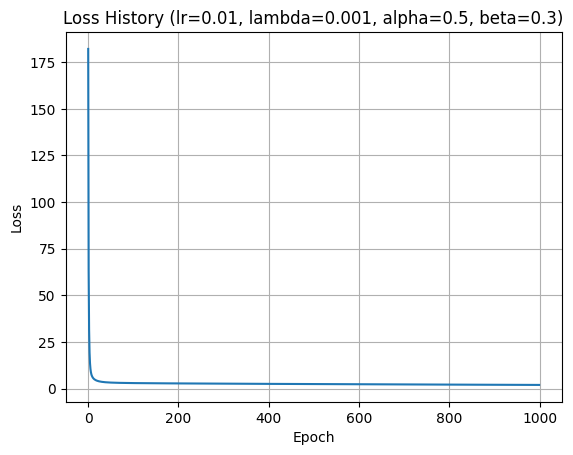

Test Loss: 4928553.6776


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

class MultiTaskModel:
    def __init__(self, input_dim, alpha=0.5, beta=0.5, lambda_reg=0.1):
        self.w_reg = np.random.randn(input_dim)
        self.b_reg = 0.0
        self.w_cls = np.random.randn(input_dim)
        self.b_cls = 0.0
        self.alpha = alpha
        self.beta = beta
        self.lambda_reg = lambda_reg
        self.loss_history = []  # Initialize an empty list to store the loss

    def predict_reg(self, X):
        return X.dot(self.w_reg) + self.b_reg

    def predict_cls(self, X):
        return expit(X.dot(self.w_cls) + self.b_cls)

    def compute_loss(self, X, y_reg, y_cls, epsilon=1e-10):
        y_pred_reg = self.predict_reg(X)
        mse_loss = np.mean((y_reg - y_pred_reg) ** 2)

        y_pred_cls = self.predict_cls(X)
        y_pred_cls = np.clip(y_pred_cls, epsilon, 1 - epsilon)
        bce_loss = -np.mean(y_cls * np.log(y_pred_cls) + (1 - y_cls) * np.log(1 - y_pred_cls))
        reg_loss = (self.lambda_reg / 2) * (np.sum(self.w_reg ** 2) + np.sum(self.w_cls ** 2))
        total_loss = self.alpha * mse_loss + self.beta * bce_loss + reg_loss
        return total_loss

    def fit(self, X, y_reg, y_cls, lr=0.01, epochs=500):
        n_samples, n_features = X.shape

        for epoch in range(epochs):
            y_pred_reg = self.predict_reg(X)
            y_pred_cls = self.predict_cls(X)

            grad_w_reg = -(2/n_samples) * X.T.dot(y_reg - y_pred_reg) + self.lambda_reg * self.w_reg
            grad_b_reg = -(2/n_samples) * np.sum(y_reg - y_pred_reg)

            grad_w_cls = -(1/n_samples) * X.T.dot(y_cls - y_pred_cls) + self.lambda_reg * self.w_cls
            grad_b_cls = -(1/n_samples) * np.sum(y_cls - y_pred_cls)

            self.w_reg -= lr * grad_w_reg
            self.b_reg -= lr * grad_b_reg
            self.w_cls -= lr * grad_w_cls
            self.b_cls -= lr * grad_b_cls

            self.alpha = 1.0 / (1.0 + epoch)
            self.beta = 1.0 - self.alpha

            loss = self.compute_loss(X, y_reg, y_cls)
            self.loss_history.append(loss)

            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')


def plot_loss_history(loss_history, lr, lambda_reg, alpha, beta, filename_prefix):
    plt.figure()
    plt.plot(loss_history)
    plt.title(f'Loss History (lr={lr}, lambda={lambda_reg}, alpha={alpha}, beta={beta})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()
    plt.savefig(f'{filename_prefix}_lr_{lr}_lambda_{lambda_reg}_alpha_{alpha}_beta_{beta}.png')
    plt.close()


def hyperparameter_tuning(X_train, y_train_reg, y_train_cls):
    best_loss = np.inf
    best_params = None

    learning_rates = [0.001, 0.01, 0.1, 0.0001]
    lambda_regs = [0.001, 0.01, 0.1, 0.0001]
    alphas = [0.3, 0.5, 0.7]
    betas = [0.3, 0.5, 0.7]

    for lr in learning_rates:
        for lambda_reg in lambda_regs:
            for alpha in alphas:
                for beta in betas:
                    model = MultiTaskModel(input_dim=X_train.shape[1], alpha=alpha, beta=beta, lambda_reg=lambda_reg)
                    model.fit(X_train, y_train_reg, y_train_cls, lr=lr, epochs=500)

                    # Plot and save the loss history for each hyperparameter combination
                    plot_loss_history(
                        model.loss_history,
                        lr,
                        lambda_reg,
                        alpha,
                        beta,
                        filename_prefix='loss_plot'
                    )

                    loss = model.compute_loss(X_train, y_train_reg, y_train_cls)

                    if loss < best_loss:
                        best_loss = loss
                        best_params = {
                            'lr': lr,
                            'lambda_reg': lambda_reg,
                            'alpha': alpha,
                            'beta': beta
                        }

                    print(f"lr: {lr}, lambda: {lambda_reg}, alpha: {alpha}, beta: {beta}, Loss: {loss:.4f}")

    print(f"Best Hyperparameters: lr={best_params['lr']}, lambda_reg={best_params['lambda_reg']}, alpha={best_params['alpha']}, beta={best_params['beta']}")
    return best_params


def train_with_best_params(X_train, y_train_reg, y_train_cls, best_params):
    model = MultiTaskModel(input_dim=X_train.shape[1],
                           alpha=best_params['alpha'],
                           beta=best_params['beta'],
                           lambda_reg=best_params['lambda_reg'])
    model.fit(X_train, y_train_reg, y_train_cls, lr=best_params['lr'], epochs=1000)

    # Save the final loss plot for the best model
    plot_loss_history(
        model.loss_history,
        best_params['lr'],
        best_params['lambda_reg'],
        best_params['alpha'],
        best_params['beta'],
        filename_prefix='final_loss_plot'
    )

    return model



train_y_reg = np.log(train_y_reg)
# best_params = hyperparameter_tuning(train_X, train_y_reg, train_y_cls)
best_params = {  'lr': 0.01,
               'lambda_reg': 0.001,
                            'alpha': 0.5,
                            'beta': 0.3
                        }

model = train_with_best_params(train_X, train_y_reg, train_y_cls, best_params)

test_loss = model.compute_loss(test_X, np.log(test_y_reg), test_y_reg)
print(f"Test Loss: {test_loss:.4f}")

In [46]:
test_loss = model.compute_loss(train_X, np.log(train_y_reg),train_y_reg)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 1.9033


In [47]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

def evaluate_metrics(model, X_test, y_test_reg, y_test_cls):

    y_pred_reg = model.predict_reg(X_test)
    y_pred_cls = model.predict_cls(X_test)
    y_pred_cls_binary = (y_pred_cls > 0.5).astype(int)

    mse = mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)

    accuracy = accuracy_score(y_test_cls, y_pred_cls_binary)
    precision = precision_score(y_test_cls, y_pred_cls_binary)
    recall = recall_score(y_test_cls, y_pred_cls_binary)
    f1 = f1_score(y_test_cls, y_pred_cls_binary)

    print(f"Regression Metrics:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}")
    print(f"Classification Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

test_y_reg=np.log(test_y_reg)
evaluate_metrics(model, test_X, test_y_reg, test_y_cls)


Regression Metrics:
  Mean Squared Error (MSE): 1.8818
  R2 Score: -28.2429
Classification Metrics:
  Accuracy: 0.4914
  Precision: 0.4695
  Recall: 0.4712
  F1-Score: 0.4704


Epoch 0, Loss: 63.9274
Epoch 10, Loss: 16.9618
Epoch 20, Loss: 14.7242
Epoch 30, Loss: 13.9295
Epoch 40, Loss: 13.5218
Epoch 50, Loss: 13.2736
Epoch 60, Loss: 13.1063
Epoch 70, Loss: 12.9859
Epoch 80, Loss: 12.8949
Epoch 90, Loss: 12.8236
Epoch 100, Loss: 12.7662
Epoch 110, Loss: 12.7190
Epoch 120, Loss: 12.6793
Epoch 130, Loss: 12.6455
Epoch 140, Loss: 12.6164
Epoch 150, Loss: 12.5910
Epoch 160, Loss: 12.5685
Epoch 170, Loss: 12.5486
Epoch 180, Loss: 12.5307
Epoch 190, Loss: 12.5146
Epoch 200, Loss: 12.5000
Epoch 210, Loss: 12.4866
Epoch 220, Loss: 12.4744
Epoch 230, Loss: 12.4631
Epoch 240, Loss: 12.4526
Epoch 250, Loss: 12.4429
Epoch 260, Loss: 12.4339
Epoch 270, Loss: 12.4254
Epoch 280, Loss: 12.4174
Epoch 290, Loss: 12.4100
Epoch 300, Loss: 12.4029
Epoch 310, Loss: 12.3962
Epoch 320, Loss: 12.3899
Epoch 330, Loss: 12.3838
Epoch 340, Loss: 12.3781
Epoch 350, Loss: 12.3726
Epoch 360, Loss: 12.3674
Epoch 370, Loss: 12.3624
Epoch 380, Loss: 12.3575
Epoch 390, Loss: 12.3529
Epoch 400, 

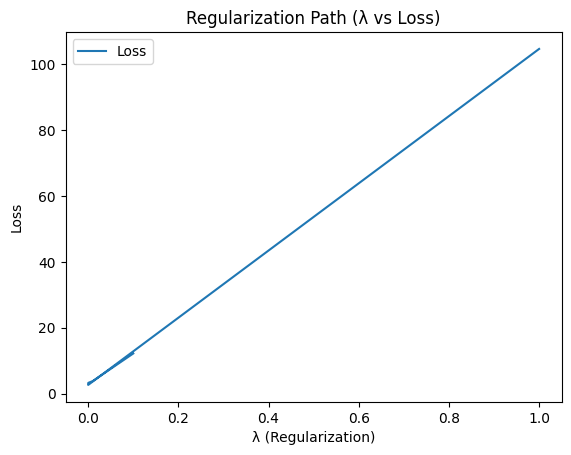

In [48]:

def regularization_path_analysis(X_train, y_train_reg, y_train_cls, lambdas):
    weights_reg = []
    weights_cls = []
    losses = []

    for lambda_reg in lambdas:
        model = MultiTaskModel(input_dim=X_train.shape[1], lambda_reg=lambda_reg)
        model.fit(X_train, y_train_reg, y_train_cls, epochs=1000, lr=0.00001)
        weights_reg.append(model.w_reg)
        weights_cls.append(model.w_cls)
        losses.append(model.compute_loss(X_train, y_train_reg, y_train_cls))

    plt.plot(lambdas, losses, label='Loss')
    plt.title('Regularization Path (λ vs Loss)')
    plt.xlabel('λ (Regularization)')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

lambdas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 1]
regularization_path_analysis(train_X, np.log(train_y_reg), train_y_cls, lambdas)

25th Quantile: 15.92, 50th Quantile: 16.17, 75th Quantile: 16.37


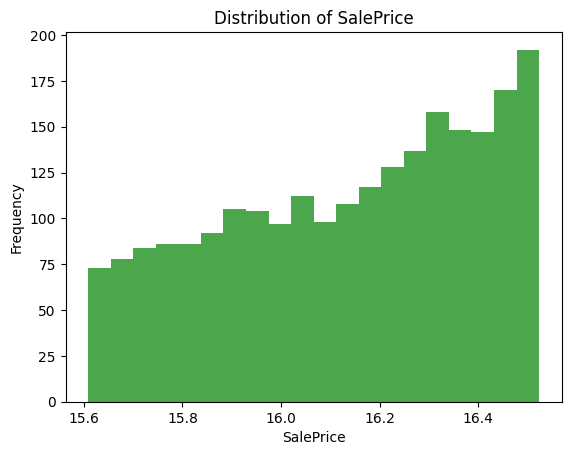

In [49]:
def quantile_analysis(y_train_reg):
    quantiles = np.percentile(y_train_reg, [25, 50, 75])
    print(f"25th Quantile: {quantiles[0]:.2f}, 50th Quantile: {quantiles[1]:.2f}, 75th Quantile: {quantiles[2]:.2f}")

    plt.hist(y_train_reg, bins=20, alpha=0.7, color='g')
    plt.title('Distribution of SalePrice')
    plt.xlabel('SalePrice')
    plt.ylabel('Frequency')
    plt.show()

quantile_analysis(train_y_reg)


In [50]:
def adaptive_hyperparameter_tuning(X_train, y_train_reg, y_train_cls):
    best_loss = np.inf
    best_params = None

    for lr in [0.01, 0.001]:
        for lambda_reg in [0.01, 0.1, 1.0]:
            model = MultiTaskModel(input_dim=X_train.shape[1], lambda_reg=lambda_reg)
            model.fit(X_train, y_train_reg, y_train_cls, epochs=100, lr=lr)
            loss = model.compute_loss(X_train, y_train_reg, y_train_cls)

            if loss < best_loss:
                best_loss = loss
                best_params = {'lr': lr, 'lambda_reg': lambda_reg}

    print(f"Best Hyperparameters: Learning Rate: {best_params['lr']}, Regularization λ: {best_params['lambda_reg']}")

adaptive_hyperparameter_tuning(train_X, np.log(train_y_reg), train_y_cls)


Epoch 0, Loss: 46.0021
Epoch 10, Loss: 6.2527
Epoch 20, Loss: 5.0064
Epoch 30, Loss: 4.5429
Epoch 40, Loss: 4.2852
Epoch 50, Loss: 4.1117
Epoch 60, Loss: 3.9810
Epoch 70, Loss: 3.8756
Epoch 80, Loss: 3.7868
Epoch 90, Loss: 3.7097
Epoch 0, Loss: 86.0419
Epoch 10, Loss: 16.3287
Epoch 20, Loss: 13.7546
Epoch 30, Loss: 12.4778
Epoch 40, Loss: 11.5987
Epoch 50, Loss: 10.9127
Epoch 60, Loss: 10.3427
Epoch 70, Loss: 9.8513
Epoch 80, Loss: 9.4177
Epoch 90, Loss: 9.0288
Epoch 0, Loss: 146.8693
Epoch 10, Loss: 88.0632
Epoch 20, Loss: 67.6256
Epoch 30, Loss: 52.8251
Epoch 40, Loss: 41.6367
Epoch 50, Loss: 33.0278
Epoch 60, Loss: 26.3327
Epoch 70, Loss: 21.0877
Epoch 80, Loss: 16.9570
Epoch 90, Loss: 13.6913
Epoch 0, Loss: 167.0396
Epoch 10, Loss: 14.9926
Epoch 20, Loss: 8.5061
Epoch 30, Loss: 6.5196
Epoch 40, Loss: 5.6486
Epoch 50, Loss: 5.1909
Epoch 60, Loss: 4.9194
Epoch 70, Loss: 4.7428
Epoch 80, Loss: 4.6189
Epoch 90, Loss: 4.5265
Epoch 0, Loss: 72.8850
Epoch 10, Loss: 19.1303
Epoch 20, Loss:

Missing values in 'YearBuilt' column handled using median imputation.
25th percentile of SalePrice in Mumbai: 8253150.00
50th percentile (Median) of SalePrice in Mumbai: 10290847.00
75th percentile of SalePrice in Mumbai: 12840374.00


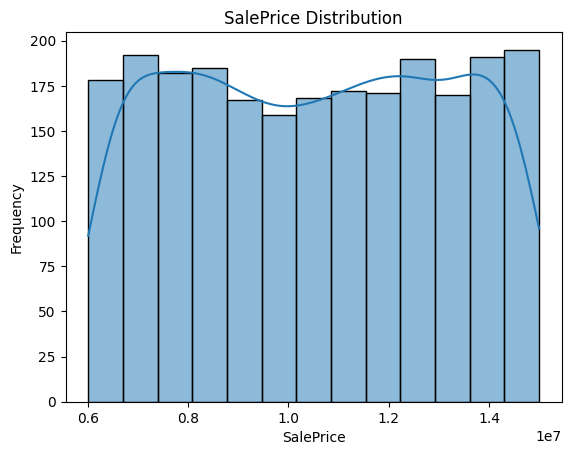

Skewness of SalePrice: -0.0051


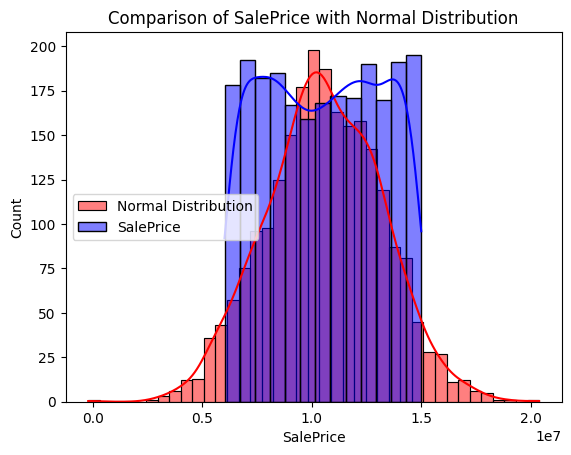

Higher median SalePrice detected. Setting alpha=0.5, beta=0.5, lambda=0.1
Epoch 0, Loss: 60.2879
Epoch 10, Loss: 16.6075
Epoch 20, Loss: 13.8756
Epoch 30, Loss: 12.4711
Epoch 40, Loss: 11.4858
Epoch 50, Loss: 10.7102
Epoch 60, Loss: 10.0646
Epoch 70, Loss: 9.5097
Epoch 80, Loss: 9.0231
Epoch 90, Loss: 8.5903
Regression Metrics:
  Mean Squared Error (MSE): 10.6780
  R2 Score: -331904.7059
Classification Metrics:
  Accuracy: 0.4776
  Precision: 0.4687
  Recall: 0.6727
  F1-Score: 0.5524


In [58]:

def compute_correlation(data, city="Delhi"):
    city_data = data[data['City'] == city]
    correlation = city_data['OverallQual'].corr(city_data['SalePrice'])
    print(f"Correlation between OverallQual and SalePrice in {city}: {correlation:.4f}")

def handle_missing_values(data):
    imputer = SimpleImputer(strategy='median')
    data['YearBuilt'] = imputer.fit_transform(data[['YearBuilt']])
    print("Missing values in 'YearBuilt' column handled using median imputation.")


def predict_quantiles(data, city="Mumbai"):
    city_data = data[data['City'] == city]
    quantiles = city_data['SalePrice'].quantile([0.25, 0.50, 0.75])
    print(f"25th percentile of SalePrice in {city}: {quantiles[0.25]:.2f}")
    print(f"50th percentile (Median) of SalePrice in {city}: {quantiles[0.50]:.2f}")
    print(f"75th percentile of SalePrice in {city}: {quantiles[0.75]:.2f}")
    return quantiles


def analyze_distribution(data):
    sale_price = data['SalePrice']

    # Plotting distribution
    sns.histplot(sale_price, kde=True)
    plt.title("SalePrice Distribution")
    plt.xlabel("SalePrice")
    plt.ylabel("Frequency")
    plt.show()

    sale_price_skew = skew(sale_price)
    print(f"Skewness of SalePrice: {sale_price_skew:.4f}")
    if abs(sale_price_skew) > 0.5:
        print("The data is highly skewed. Consider transforming the target variable (e.g., log transformation).")

    plt.figure()
    norm_data = np.random.normal(np.mean(sale_price), np.std(sale_price), len(sale_price))
    sns.histplot(norm_data, kde=True, color="r", label="Normal Distribution")
    sns.histplot(sale_price, kde=True, color="b", label="SalePrice")
    plt.title("Comparison of SalePrice with Normal Distribution")
    plt.legend()
    plt.show()


def modify_hyperparameters(quantiles, alpha, beta, lambda_reg):
    median_price = quantiles[0.50]

    if median_price < 5000000:
        alpha = 0.7
        beta = 0.3
        lambda_reg = 0.01
        print(f"Lower median SalePrice detected. Setting alpha={alpha}, beta={beta}, lambda={lambda_reg}")
    else:
        alpha = 0.5
        beta = 0.5
        lambda_reg = 0.1
        print(f"Higher median SalePrice detected. Setting alpha={alpha}, beta={beta}, lambda={lambda_reg}")

    return alpha, beta, lambda_reg


# compute_correlation(train_data, city="Delhi")
handle_missing_values(train_data)
quantiles = predict_quantiles(train_data, city="Mumbai")
analyze_distribution(train_data)

alpha, beta, lambda_reg = modify_hyperparameters(quantiles, alpha=0.5, beta=0.5, lambda_reg=0.1)

model = MultiTaskModel(input_dim=train_X.shape[1], alpha=alpha, beta=beta, lambda_reg=lambda_reg)
model.fit(train_X, train_y_reg, train_y_cls, lr=0.01, epochs=100)


evaluate_metrics(model, test_X, np.log(test_y_reg), test_y_cls)


##**Optimization Techniques Analysis**

Epoch 0, Loss: 20.6706
Epoch 10, Loss: 5.5527
Epoch 20, Loss: 3.8812
Epoch 30, Loss: 3.3723
Epoch 40, Loss: 3.1392
Epoch 50, Loss: 3.0086
Epoch 60, Loss: 2.9254
Epoch 70, Loss: 2.8669
Epoch 80, Loss: 2.8228
Epoch 90, Loss: 2.7875
Epoch 100, Loss: 2.7580
Epoch 110, Loss: 2.7326
Epoch 120, Loss: 2.7101
Epoch 130, Loss: 2.6898
Epoch 140, Loss: 2.6712
Epoch 150, Loss: 2.6540
Epoch 160, Loss: 2.6378
Epoch 170, Loss: 2.6225
Epoch 180, Loss: 2.6080
Epoch 190, Loss: 2.5941
Epoch 200, Loss: 2.5807
Epoch 210, Loss: 2.5677
Epoch 220, Loss: 2.5552
Epoch 230, Loss: 2.5430
Epoch 240, Loss: 2.5311
Epoch 250, Loss: 2.5194
Epoch 260, Loss: 2.5080
Epoch 270, Loss: 2.4967
Epoch 280, Loss: 2.4856
Epoch 290, Loss: 2.4747
Epoch 300, Loss: 2.4639
Epoch 310, Loss: 2.4533
Epoch 320, Loss: 2.4428
Epoch 330, Loss: 2.4324
Epoch 340, Loss: 2.4221
Epoch 350, Loss: 2.4118
Epoch 360, Loss: 2.4017
Epoch 370, Loss: 2.3917
Epoch 380, Loss: 2.3817
Epoch 390, Loss: 2.3718
Epoch 400, Loss: 2.3620
Epoch 410, Loss: 2.3523
Ep

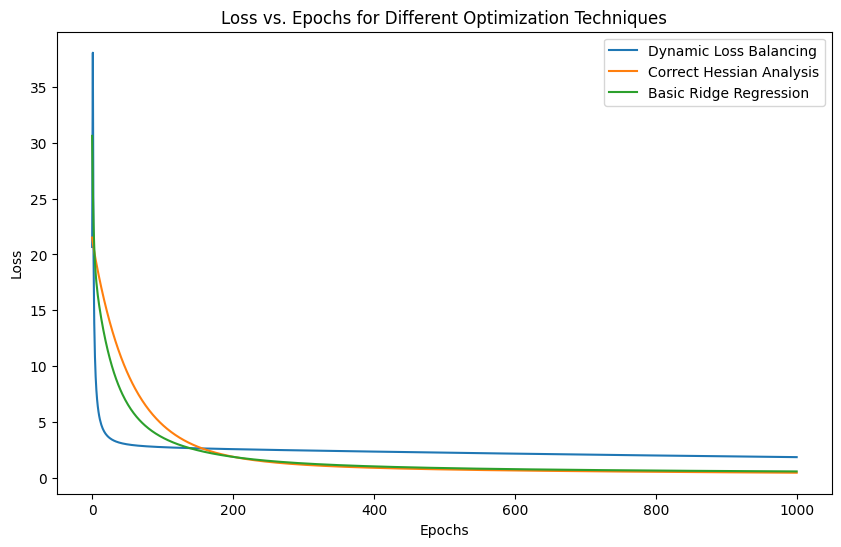

Evaluating Dynamic Loss Balancing Model
Test Loss: 1.8797, MSE: 0.1147, BCE: 1.8494, Regularization Loss: 0.0320
Evaluating Correct Hessian Analysis Model
Test Loss: 0.5258, MSE: 0.0810, BCE: 1.5558, Regularization Loss: 0.0186
Evaluating Basic Ridge Regression Model
Test Loss: 0.5758, MSE: 0.1098, BCE: 1.6414, Regularization Loss: 0.0285


In [53]:
import numpy as np
import matplotlib.pyplot as plt
#0.01, lambda_reg=0.001, alpha=0.5, beta=0.3
class MultiTaskModelOPT:
    def __init__(self, input_dim, alpha=0.5, beta=0.3, lambda_reg=0.001):
        self.w_reg = np.random.randn(input_dim)
        self.b_reg = 0.0
        self.w_cls = np.random.randn(input_dim)
        self.b_cls = 0.0
        self.alpha = alpha
        self.beta = beta
        self.lambda_reg = lambda_reg

    def predict_reg(self, X):
        return X.dot(self.w_reg) + self.b_reg

    def predict_cls(self, X):
        return expit(X.dot(self.w_cls) + self.b_cls)

    def compute_loss(self, X, y_reg, y_cls, epsilon=1e-10):
        y_pred_reg = self.predict_reg(X)
        mse_loss = np.mean((y_reg - y_pred_reg) ** 2)

        y_pred_cls = self.predict_cls(X)
        y_pred_cls = np.clip(y_pred_cls, epsilon, 1 - epsilon)
        bce_loss = -np.mean(y_cls * np.log(y_pred_cls) + (1 - y_cls) * np.log(1 - y_pred_cls))

        reg_loss = (self.lambda_reg / 2) * (np.sum(self.w_reg ** 2) + np.sum(self.w_cls ** 2))
        total_loss = self.alpha * mse_loss + self.beta * bce_loss + reg_loss
        return total_loss, mse_loss, bce_loss, reg_loss

    def fit(self, X, y_reg, y_cls, lr=0.01, epochs=100, method="basic"):
        loss_history = []
        for epoch in range(epochs):
            y_pred_reg = self.predict_reg(X)
            y_pred_cls = self.predict_cls(X)

            total_loss, mse_loss, bce_loss, reg_loss = self.compute_loss(X, y_reg, y_cls)
            loss_history.append(total_loss)

            grad_w_reg = -(2 / len(X)) * X.T.dot(y_reg - y_pred_reg) + self.lambda_reg * self.w_reg
            grad_b_reg = -(2 / len(X)) * np.sum(y_reg - y_pred_reg)

            grad_w_cls = -(1 / len(X)) * X.T.dot(y_cls - y_pred_cls) + self.lambda_reg * self.w_cls
            grad_b_cls = -(1 / len(X)) * np.sum(y_cls - y_pred_cls)

            if method == "dynamic_loss_balancing":
                self.alpha = 1.0 / (1.0 + epoch)
                self.beta = 1.0 - self.alpha
            elif method == "correct_hessian_analysis":
                hessian_reg = (2 / len(X)) * np.sum(X ** 2, axis=0) + self.lambda_reg
                hessian_cls = (1 / len(X)) * np.sum(X ** 2, axis=0) + self.lambda_reg
                grad_w_reg /= hessian_reg
                grad_w_cls /= hessian_cls
            elif method == "basic_ridge":
                pass

            self.w_reg -= lr * grad_w_reg
            self.b_reg -= lr * grad_b_reg
            self.w_cls -= lr * grad_w_cls
            self.b_cls -= lr * grad_b_cls

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

        return loss_history


train_y_reg=np.log(train_y_reg)

model_dynamic = MultiTaskModelOPT(input_dim=train_X.shape[1])
loss_dynamic = model_dynamic.fit(train_X, train_y_reg, train_y_cls, lr=0.01, epochs=1000, method="dynamic_loss_balancing")

model_hessian = MultiTaskModelOPT(input_dim=train_X.shape[1])
loss_hessian = model_hessian.fit(train_X, train_y_reg, train_y_cls, lr=0.01, epochs=1000, method="correct_hessian_analysis")

model_ridge = MultiTaskModelOPT(input_dim=train_X.shape[1])
loss_ridge = model_ridge.fit(train_X, train_y_reg, train_y_cls, lr=0.01, epochs=1000, method="basic_ridge")

plt.figure(figsize=(10, 6))
plt.plot(loss_dynamic, label="Dynamic Loss Balancing")
plt.plot(loss_hessian, label="Correct Hessian Analysis")
plt.plot(loss_ridge, label="Basic Ridge Regression")
plt.title("Loss vs. Epochs for Different Optimization Techniques")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

def evaluate_model(model, X_test, y_test_reg, y_test_cls):
    total_loss, mse_loss, bce_loss, reg_loss = model.compute_loss(X_test, y_test_reg, y_test_cls)
    print(f"Test Loss: {total_loss:.4f}, MSE: {mse_loss:.4f}, BCE: {bce_loss:.4f}, Regularization Loss: {reg_loss:.4f}")

test_y_reg=np.log(test_y_reg)
print("Evaluating Dynamic Loss Balancing Model")
evaluate_model(model_dynamic, test_X, test_y_reg, test_y_cls)

print("Evaluating Correct Hessian Analysis Model")
evaluate_model(model_hessian, test_X, test_y_reg, test_y_cls)

print("Evaluating Basic Ridge Regression Model")
evaluate_model(model_ridge, test_X, test_y_reg, test_y_cls)


##**Regularization Techniques Analysis**

Epoch 0, Loss: 20.4145
Epoch 10, Loss: 14.9910
Epoch 20, Loss: 11.8955
Epoch 30, Loss: 9.7199
Epoch 40, Loss: 8.1538
Epoch 50, Loss: 6.9982
Epoch 60, Loss: 6.1228
Epoch 70, Loss: 5.4415
Epoch 80, Loss: 4.8976
Epoch 90, Loss: 4.4528
Epoch 100, Loss: 4.0813
Epoch 110, Loss: 3.7654
Epoch 120, Loss: 3.4927
Epoch 130, Loss: 3.2544
Epoch 140, Loss: 3.0441
Epoch 150, Loss: 2.8570
Epoch 160, Loss: 2.6896
Epoch 170, Loss: 2.5390
Epoch 180, Loss: 2.4030
Epoch 190, Loss: 2.2797
Epoch 200, Loss: 2.1676
Epoch 210, Loss: 2.0655
Epoch 220, Loss: 1.9722
Epoch 230, Loss: 1.8868
Epoch 240, Loss: 1.8085
Epoch 250, Loss: 1.7366
Epoch 260, Loss: 1.6705
Epoch 270, Loss: 1.6095
Epoch 280, Loss: 1.5532
Epoch 290, Loss: 1.5011
Epoch 300, Loss: 1.4528
Epoch 310, Loss: 1.4080
Epoch 320, Loss: 1.3664
Epoch 330, Loss: 1.3277
Epoch 340, Loss: 1.2916
Epoch 350, Loss: 1.2578
Epoch 360, Loss: 1.2263
Epoch 370, Loss: 1.1968
Epoch 380, Loss: 1.1691
Epoch 390, Loss: 1.1430
Epoch 400, Loss: 1.1186
Epoch 410, Loss: 1.0955


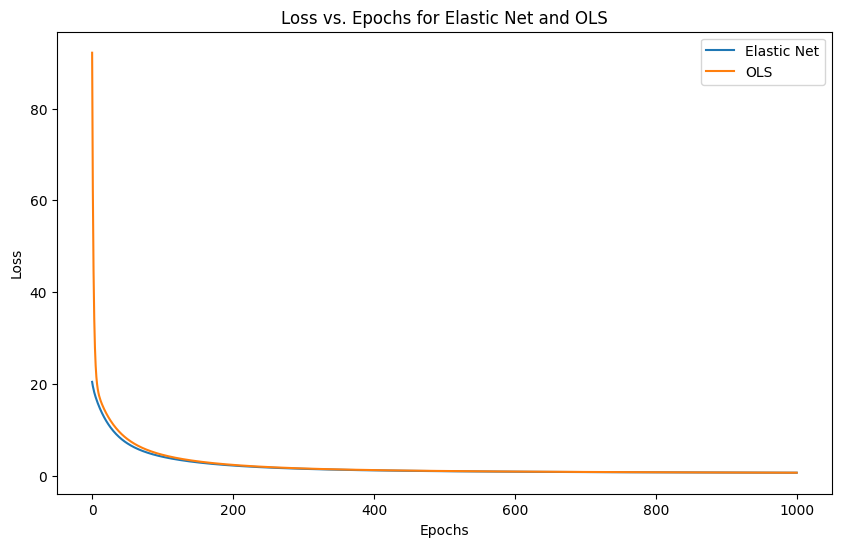

Evaluating Elastic Net Model
Test Loss: 0.6790, MSE: 0.1151, BCE: 1.8680, Regularization Loss: 0.0610
Evaluating OLS Model
Test Loss: 0.6157, MSE: 0.1168, BCE: 1.6688, Regularization Loss: 0.0566


In [54]:

class MultiTaskModelReg:
    def __init__(self, input_dim, alpha=0.5, beta=0.3, l1_ratio=0.5, lambda_reg=0.001):

        self.w_reg = np.random.randn(input_dim)
        self.b_reg = 0.0
        self.w_cls = np.random.randn(input_dim)
        self.b_cls = 0.0
        self.alpha = alpha
        self.beta = beta
        self.l1_ratio = l1_ratio
        self.lambda_reg = lambda_reg

    def predict_reg(self, X):
        return X.dot(self.w_reg) + self.b_reg

    def predict_cls(self, X):
        return 1 / (1 + np.exp(-X.dot(self.w_cls) - self.b_cls))

    def compute_loss(self, X, y_reg, y_cls, epsilon=1e-10):
        y_pred_reg = self.predict_reg(X)
        y_pred_cls = self.predict_cls(X)


        mse_loss = np.mean((y_reg - y_pred_reg) ** 2)


        y_pred_cls = np.clip(y_pred_cls, epsilon, 1 - epsilon)
        bce_loss = -np.mean(y_cls * np.log(y_pred_cls) + (1 - y_cls) * np.log(1 - y_pred_cls))


        l1_loss = self.l1_ratio * (np.sum(np.abs(self.w_reg)) + np.sum(np.abs(self.w_cls)))
        l2_loss = (1 - self.l1_ratio) * (np.sum(self.w_reg ** 2) + np.sum(self.w_cls ** 2))
        reg_loss = self.lambda_reg * (l1_loss + l2_loss)


        total_loss = self.alpha * mse_loss + self.beta * bce_loss + reg_loss
        return total_loss, mse_loss, bce_loss, reg_loss

    def fit(self, X, y_reg, y_cls, lr=0.01, epochs=100, method="elastic_net"):
        loss_history = []
        for epoch in range(epochs):

            y_pred_reg = self.predict_reg(X)
            y_pred_cls = self.predict_cls(X)


            total_loss, mse_loss, bce_loss, reg_loss = self.compute_loss(X, y_reg, y_cls)
            loss_history.append(total_loss)


            grad_w_reg = -(2 / len(X)) * X.T.dot(y_reg - y_pred_reg)
            grad_b_reg = -(2 / len(X)) * np.sum(y_reg - y_pred_reg)

            grad_w_cls = -(1 / len(X)) * X.T.dot(y_cls - y_pred_cls)
            grad_b_cls = -(1 / len(X)) * np.sum(y_cls - y_pred_cls)

            if method == "elastic_net":
                grad_w_reg += self.lambda_reg * (self.l1_ratio * np.sign(self.w_reg) + (1 - self.l1_ratio) * self.w_reg)
                grad_w_cls += self.lambda_reg * (self.l1_ratio * np.sign(self.w_cls) + (1 - self.l1_ratio) * self.w_cls)
            elif method == "ols":
                pass

            self.w_reg -= lr * grad_w_reg
            self.b_reg -= lr * grad_b_reg
            self.w_cls -= lr * grad_w_cls
            self.b_cls -= lr * grad_b_cls

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

        return loss_history

model_elastic_net = MultiTaskModelReg(input_dim=train_X.shape[1], l1_ratio=0.5)
loss_elastic_net = model_elastic_net.fit(train_X, train_y_reg, train_y_cls, lr=0.01, epochs=1000, method="elastic_net")


model_ols = MultiTaskModelReg(input_dim=train_X.shape[1])
loss_ols = model_ols.fit(train_X, train_y_reg, train_y_cls, lr=0.01, epochs=1000, method="ols")


plt.figure(figsize=(10, 6))
plt.plot(loss_elastic_net, label="Elastic Net")
plt.plot(loss_ols, label="OLS")
plt.title("Loss vs. Epochs for Elastic Net and OLS")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


def evaluate_model(model, X_test, y_test_reg, y_test_cls):
    total_loss, mse_loss, bce_loss, reg_loss = model.compute_loss(X_test, y_test_reg, y_test_cls)
    print(f"Test Loss: {total_loss:.4f}, MSE: {mse_loss:.4f}, BCE: {bce_loss:.4f}, Regularization Loss: {reg_loss:.4f}")


print("Evaluating Elastic Net Model")
evaluate_model(model_elastic_net, test_X, test_y_reg, test_y_cls)

print("Evaluating OLS Model")
evaluate_model(model_ols, test_X, test_y_reg, test_y_cls)


##**Feature Selection Techniques Analysis**

Epoch 0, Loss: 62.7698
Epoch 10, Loss: 40.2456
Epoch 20, Loss: 26.6442
Epoch 30, Loss: 18.2537
Epoch 40, Loss: 12.9641
Epoch 50, Loss: 9.5560
Epoch 60, Loss: 7.3122
Epoch 70, Loss: 5.8030
Epoch 80, Loss: 4.7664
Epoch 90, Loss: 4.0398
Epoch 100, Loss: 3.5202
Epoch 110, Loss: 3.1414
Epoch 120, Loss: 2.8602
Epoch 130, Loss: 2.6477
Epoch 140, Loss: 2.4843
Epoch 150, Loss: 2.3567
Epoch 160, Loss: 2.2555
Epoch 170, Loss: 2.1741
Epoch 180, Loss: 2.1077
Epoch 190, Loss: 2.0527
Epoch 200, Loss: 2.0067
Epoch 210, Loss: 1.9676
Epoch 220, Loss: 1.9341
Epoch 230, Loss: 1.9051
Epoch 240, Loss: 1.8795
Epoch 250, Loss: 1.8569
Epoch 260, Loss: 1.8366
Epoch 270, Loss: 1.8181
Epoch 280, Loss: 1.8013
Epoch 290, Loss: 1.7857
Epoch 300, Loss: 1.7713
Epoch 310, Loss: 1.7577
Epoch 320, Loss: 1.7448
Epoch 330, Loss: 1.7326
Epoch 340, Loss: 1.7209
Epoch 350, Loss: 1.7096
Epoch 360, Loss: 1.6987
Epoch 370, Loss: 1.6881
Epoch 380, Loss: 1.6777
Epoch 390, Loss: 1.6676
Epoch 400, Loss: 1.6576
Epoch 410, Loss: 1.647

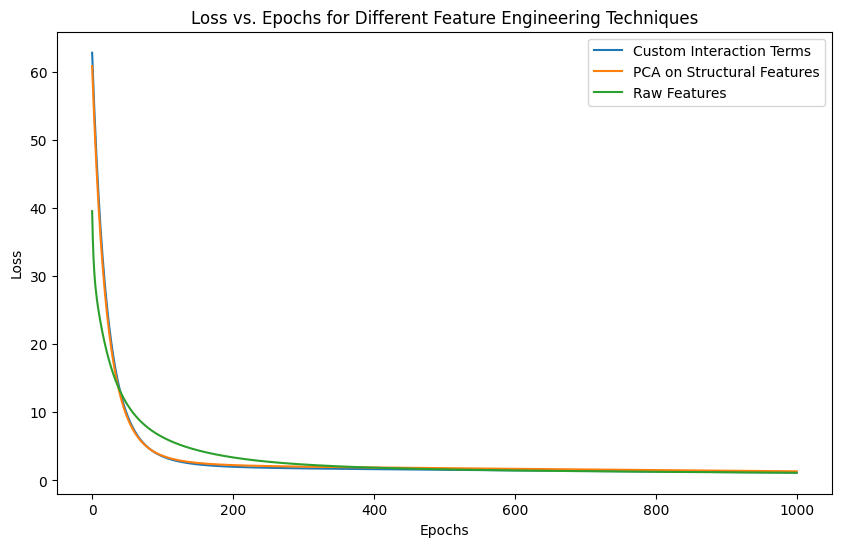

Evaluating Interaction Terms Model
Test Loss: 1.3884, MSE: 0.0003, BCE: 2.6906, Regularization Loss: 0.0430
Evaluating PCA Model
Test Loss: 1.0871, MSE: 0.0002, BCE: 2.0709, Regularization Loss: 0.0515
Evaluating Raw Features Model
Test Loss: 1.2452, MSE: 0.1336, BCE: 2.1979, Regularization Loss: 0.0794


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class MultiTaskModelFS:
    def __init__(self, input_dim, alpha=0.5, beta=0.5, l1_ratio=0.5, lambda_reg=0.1):

        self.w_reg = np.random.randn(input_dim)
        self.b_reg = 0.0
        self.w_cls = np.random.randn(input_dim)
        self.b_cls = 0.0

        self.alpha = alpha
        self.beta = beta
        self.l1_ratio = l1_ratio
        self.lambda_reg = lambda_reg

    def predict_reg(self, X):
        return X.dot(self.w_reg) + self.b_reg

    def predict_cls(self, X):
        return 1 / (1 + np.exp(-X.dot(self.w_cls) - self.b_cls))  # Sigmoid

    def compute_loss(self, X, y_reg, y_cls, epsilon=1e-10):

        y_pred_reg = self.predict_reg(X)
        y_pred_cls = self.predict_cls(X)

        mse_loss = np.mean((y_reg - y_pred_reg) ** 2)

        y_pred_cls = np.clip(y_pred_cls, epsilon, 1 - epsilon)
        bce_loss = -np.mean(y_cls * np.log(y_pred_cls) + (1 - y_cls) * np.log(1 - y_pred_cls))

        l1_loss = self.l1_ratio * (np.sum(np.abs(self.w_reg)) + np.sum(np.abs(self.w_cls)))
        l2_loss = (1 - self.l1_ratio) * (np.sum(self.w_reg ** 2) + np.sum(self.w_cls ** 2))
        reg_loss = self.lambda_reg * (l1_loss + l2_loss)


        total_loss = self.alpha * mse_loss + self.beta * bce_loss + reg_loss
        return total_loss, mse_loss, bce_loss, reg_loss

    def fit(self, X, y_reg, y_cls, lr=0.01, epochs=100):
        loss_history = []
        for epoch in range(epochs):

            y_pred_reg = self.predict_reg(X)
            y_pred_cls = self.predict_cls(X)
            total_loss, mse_loss, bce_loss, reg_loss = self.compute_loss(X, y_reg, y_cls)
            loss_history.append(total_loss)
            grad_w_reg = -(2 / len(X)) * X.T.dot(y_reg - y_pred_reg)
            grad_b_reg = -(2 / len(X)) * np.sum(y_reg - y_pred_reg)

            grad_w_cls = -(1 / len(X)) * X.T.dot(y_cls - y_pred_cls)
            grad_b_cls = -(1 / len(X)) * np.sum(y_cls - y_pred_cls)
            grad_w_reg += self.lambda_reg * (self.l1_ratio * np.sign(self.w_reg) + (1 - self.l1_ratio) * self.w_reg)
            grad_w_cls += self.lambda_reg * (self.l1_ratio * np.sign(self.w_cls) + (1 - self.l1_ratio) * self.w_cls)
            self.w_reg -= lr * grad_w_reg
            self.b_reg -= lr * grad_b_reg
            self.w_cls -= lr * grad_w_cls
            self.b_cls -= lr * grad_b_cls

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

        return loss_history



X_train_interaction = train_X.copy()
X_test_interaction = test_X.copy()

X_train_interaction['YearBuilt_OverallQual'] = train_X['YearBuilt'] * train_X['OverallCond']
X_test_interaction['YearBuilt_OverallQual'] = test_X['YearBuilt'] * test_X['OverallCond']

X_train_interaction = scaler.fit_transform(X_train_interaction)
X_test_interaction = scaler.fit_transform(X_test_interaction)


pca = PCA(n_components=len(numeric_cols))
X_train_pca = train_X.copy()
X_train_pca[numeric_cols] = pca.fit_transform(train_X[numeric_cols])

X_train_pca = scaler.fit_transform(X_train_pca)

X_train_raw = train_X


model_interaction = MultiTaskModelFS(input_dim=X_train_interaction.shape[1], lambda_reg=0.001, l1_ratio=0.5)
loss_interaction = model_interaction.fit(X_train_interaction, train_y_reg, train_y_cls, lr=0.01, epochs=1000)


model_pca = MultiTaskModelFS(input_dim=X_train_pca.shape[1], lambda_reg=0.001, l1_ratio=0.5)
loss_pca = model_pca.fit(X_train_pca, train_y_reg, train_y_cls, lr=0.01, epochs=1000)

model_raw = MultiTaskModelFS(input_dim=X_train_raw.shape[1], lambda_reg=0.001, l1_ratio=0.5)
loss_raw = model_raw.fit(X_train_raw, train_y_reg,train_y_cls, lr=0.01, epochs=1000)


plt.figure(figsize=(10, 6))
plt.plot(loss_interaction, label="Custom Interaction Terms")
plt.plot(loss_pca, label="PCA on Structural Features")
plt.plot(loss_raw, label="Raw Features")
plt.title("Loss vs. Epochs for Different Feature Engineering Techniques")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

def evaluate_model(model, X_test, y_test_reg, y_test_cls):
    total_loss, mse_loss, bce_loss, reg_loss = model.compute_loss(X_test, y_test_reg, y_test_cls)
    print(f"Test Loss: {total_loss:.4f}, MSE: {mse_loss:.4f}, BCE: {bce_loss:.4f}, Regularization Loss: {reg_loss:.4f}")


print("Evaluating Interaction Terms Model")
evaluate_model(model_interaction, X_test_interaction, test_y_reg, test_y_cls)

print("Evaluating PCA Model")
evaluate_model(model_pca, test_X, test_y_reg, test_y_cls)

print("Evaluating Raw Features Model")
evaluate_model(model_raw, test_X, test_y_reg, test_y_cls)


##**Feature Importance**

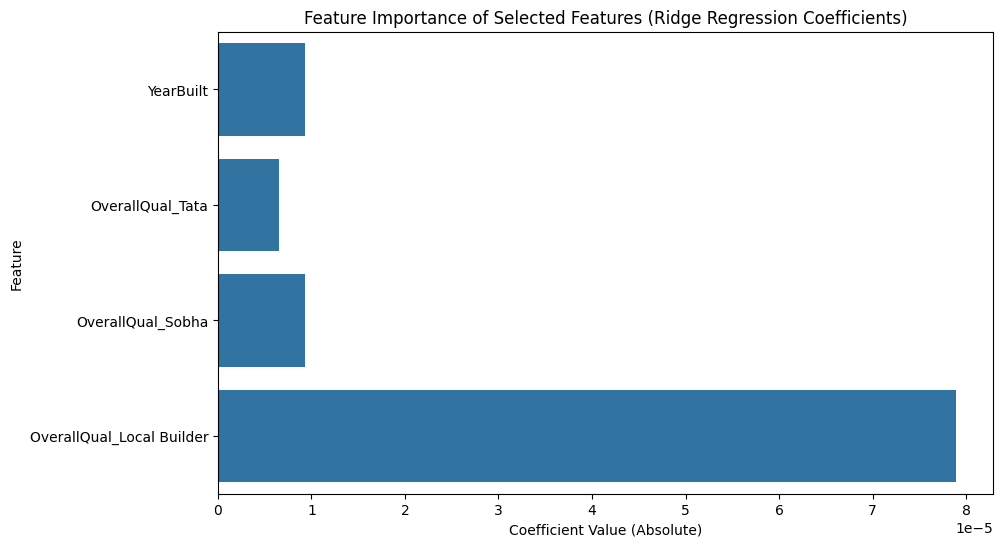

In [56]:
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(train_X, train_y_reg)

feature_importances = pd.Series(np.abs(ridge_model.coef_), index=train_X.columns)

selected_features = ['YearBuilt', 'OverallQual_Tata', 'OverallQual_Sobha', 'OverallQual_Local Builder']
selected_importances = feature_importances[selected_features]

plt.figure(figsize=(10, 6))
sns.barplot(x=selected_importances.values, y=selected_importances.index)
plt.title('Feature Importance of Selected Features (Ridge Regression Coefficients)')
plt.xlabel('Coefficient Value (Absolute)')
plt.ylabel('Feature')
plt.show()
